# School Quality Attendance for NYC Public Schools  

**Steps:**:
1. Preparing public school attendance data
2. Matching public school attendance data with neighborhood-level school location dataset.

## School Attendance by Borough for NYC Public Schools

Michael Garner
uniqname: mngarner

Dataset: NYC Public Borough Attendance Results for 2018 - 2023
URL: https://infohub.nyced.org/reports/students-and-schools/school-quality/information-and-data-overview/end-of-year-attendance-and-chronic-absenteeism-data

Objective: Investigate the attendance rates for NYC public schools at the borough level for years 2018-2023, which may or may not correlate with eviction rates of families or housing prices in the area.

In [33]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
# Load data from excel file
eduData = pd.read_excel(
    "./data/public-borough-attendance-results-2018-2023.xlsx", sheet_name="Poverty"
)
eduData

,Borough,Grade,Category,Year,# Total Days,# Days Absent,# Days Present,% Attendance,# Contributing 10+ Total Days and 1+ Pres Day,# Chronically Absent,% Chronically Absent
0,Bronx,All Grades,Not Poverty,2018-19,4486011,325072,4160939,92.753654,27214,5679,20.867935
1,Bronx,All Grades,Poverty,2018-19,29195861,3124510,26071351,89.298103,174947,65284,37.316444
2,Bronx,All Grades,Not Poverty,2019-20,2669112,174680,2494432,93.455498,24413,4537,18.584360
3,Bronx,All Grades,Poverty,2019-20,18589103,1871363,16717740,89.933014,169471,57454,33.901966
4,Bronx,All Grades,Not Poverty,2020-21,3850658,260937,3589721,93.223572,23071,4500,19.505007
...,...,...,...,...,...,...,...,...,...,...,...
745,Staten Island,12,Poverty,2020-21,453229,91438,361791,79.825211,2651,1248,47.076576
746,Staten Island,12,Not Poverty,2021-22,298267,37956,260311,87.274490,1779,779,43.788647
747,Staten Island,12,Poverty,2021-22,433600,76204,357396,82.425278,2616,1375,52.561161
748,Staten Island,12,Not Poverty,2022-23,277592,25666,251926,90.754059,1699,533,31.371395


In [35]:
# Add a county column based on borough (coextensive)
boroughMap = {
    "Bronx": "Bronx",
    "Brooklyn": "Kings",
    "Manhattan": "New York",
    "Queens": "Queens",
    "Staten Island": "Richmond",
}

eduData.insert(1, "County", eduData["Borough"].map(boroughMap))

# Rename poverty category column
eduData.rename(columns={"Category": "Poverty Category"}, inplace=True)
eduData

,Borough,County,Grade,Poverty Category,Year,# Total Days,# Days Absent,# Days Present,% Attendance,# Contributing 10+ Total Days and 1+ Pres Day,# Chronically Absent,% Chronically Absent
0,Bronx,Bronx,All Grades,Not Poverty,2018-19,4486011,325072,4160939,92.753654,27214,5679,20.867935
1,Bronx,Bronx,All Grades,Poverty,2018-19,29195861,3124510,26071351,89.298103,174947,65284,37.316444
2,Bronx,Bronx,All Grades,Not Poverty,2019-20,2669112,174680,2494432,93.455498,24413,4537,18.584360
3,Bronx,Bronx,All Grades,Poverty,2019-20,18589103,1871363,16717740,89.933014,169471,57454,33.901966
4,Bronx,Bronx,All Grades,Not Poverty,2020-21,3850658,260937,3589721,93.223572,23071,4500,19.505007
...,...,...,...,...,...,...,...,...,...,...,...,...
745,Staten Island,Richmond,12,Poverty,2020-21,453229,91438,361791,79.825211,2651,1248,47.076576
746,Staten Island,Richmond,12,Not Poverty,2021-22,298267,37956,260311,87.274490,1779,779,43.788647
747,Staten Island,Richmond,12,Poverty,2021-22,433600,76204,357396,82.425278,2616,1375,52.561161
748,Staten Island,Richmond,12,Not Poverty,2022-23,277592,25666,251926,90.754059,1699,533,31.371395


In [36]:
# Write modified data to csv file
eduData.to_csv("./data/nyc_attendance_cleaned.csv", index=False)

# Isolate provided all-grades aggregate data
allGrades = eduData[eduData["Grade"] == "All Grades"]

<Axes: title={'center': 'Mean Chronic Absenteeism by Borough and Year'}, xlabel='Academic Year', ylabel='% Chronically Absent'>

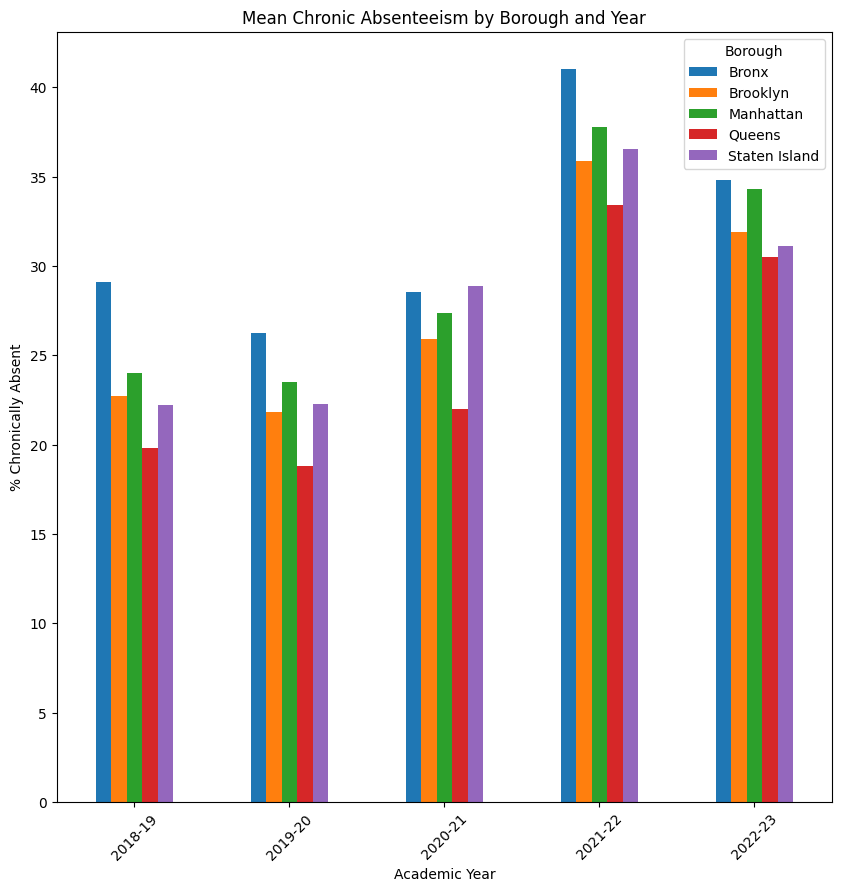

In [37]:
# Plot chronic absenteeism by borough and year
allGrades.groupby(["Year", "Borough"])["% Chronically Absent"].mean().unstack().plot(
    kind="bar",
    figsize=(10, 10),
    title="Mean Chronic Absenteeism by Borough and Year",
    xlabel="Academic Year",
    ylabel="% Chronically Absent",
    rot=45,
)

<Axes: title={'center': 'Mean Chronic Absenteeism by Borough and Poverty'}, xlabel='Borough', ylabel='% Chronically Absent'>

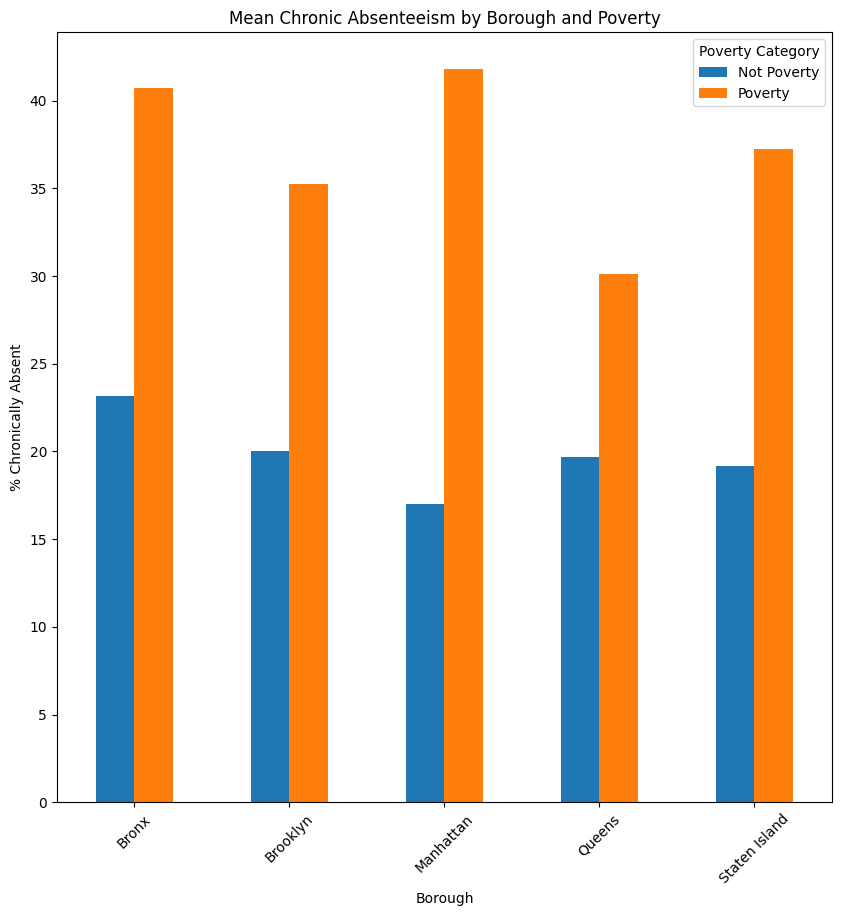

In [38]:
# Plot chronic absenteeism by borough and poverty category
allGrades.groupby(["Borough", "Poverty Category"])["% Chronically Absent"].mean().unstack().plot(
    kind="bar",
    figsize=(10, 10),
    title="Mean Chronic Absenteeism by Borough and Poverty",
    xlabel="Borough",
    ylabel="% Chronically Absent",
    rot=45,
)

<Axes: title={'center': 'Mean Chronic Absenteeism by Grade and Poverty'}, xlabel='Grade', ylabel='% Chronically Absent'>

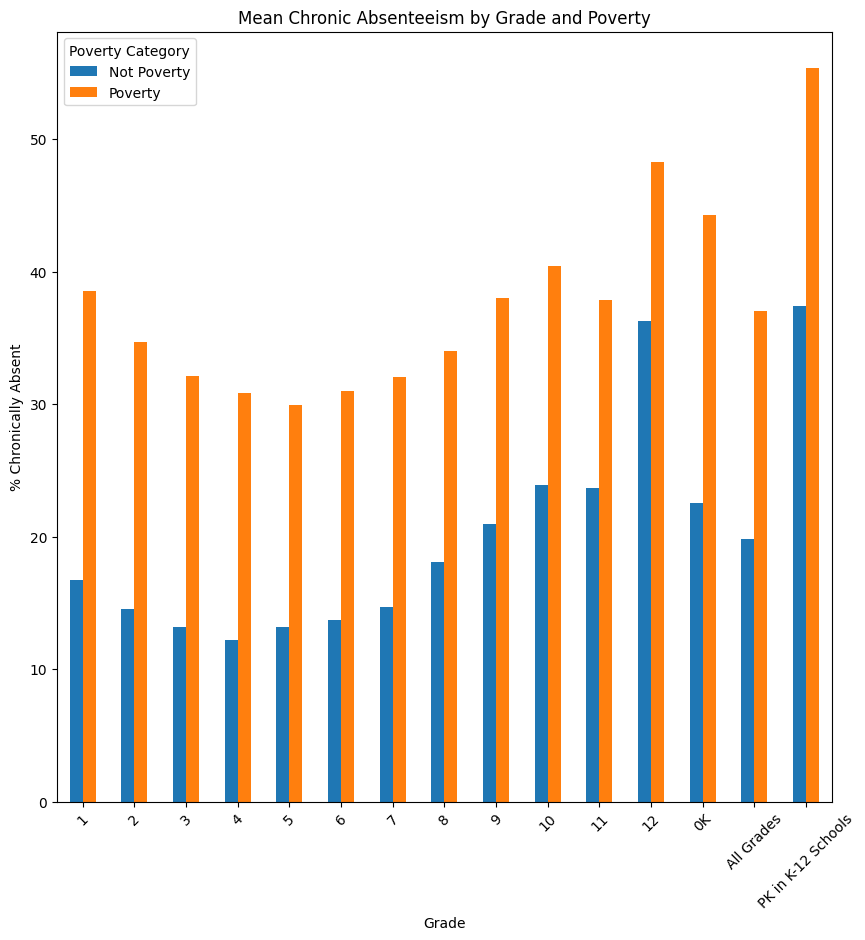

In [39]:
# Chronic absenteeism by grade and poverty
eduData.groupby(["Grade", "Poverty Category"])["% Chronically Absent"].mean().unstack().plot(
    kind="bar",
    figsize=(10, 10),
    title="Mean Chronic Absenteeism by Grade and Poverty",
    xlabel="Grade",
    ylabel="% Chronically Absent",
    rot=45,
)

In [40]:
## Read-in school level dataset
schoolData = pd.read_excel(
    "./data/public-school-attendance-results-2018-2023-trimmed.xlsx", sheet_name="All Students"
)
schoolData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53607 entries, 0 to 53606
Data columns (total 12 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   DBN                                            53607 non-null  object
 1   School Name                                    53607 non-null  object
 2   Grade                                          53607 non-null  object
 3   Category                                       53607 non-null  object
 4   Year                                           53607 non-null  object
 5   # Total Days                                   53607 non-null  int64 
 6   # Days Absent                                  53607 non-null  object
 7   # Days Present                                 53607 non-null  object
 8   % Attendance                                   53607 non-null  object
 9   # Contributing 10+ Total Days and 1+ Pres Day  53607 non-null

In [41]:
schoolData_clean = schoolData[schoolData["Grade"] == "All Grades"]
schoolData_clean["Year"] = schoolData_clean["Year"].apply(lambda x: int(x.split("-")[0]) + 1)

/var/folders/6h/pl4jttxn04s6tt3cys_lkyl40000gn/T/ipykernel_36898/1210146841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  schoolData_clean["Year"] = schoolData_clean["Year"].apply(lambda x: int(x.split("-")[0]) + 1)


In [42]:
schoolData_clean.drop(
    columns=[
        "Grade",
        "Category",
        "# Total Days",
        "# Days Absent",
        "# Days Present",
        "# Contributing 10+ Total Days and 1+ Pres Day",
        "# Chronically Absent",
    ],
    inplace=True,
)

/var/folders/6h/pl4jttxn04s6tt3cys_lkyl40000gn/T/ipykernel_36898/2201259972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  schoolData_clean.drop(


In [43]:
schoolData_clean.columns = [
    "DBN",
    "school_name",
    "year",
    "pct_attendance",
    "pct_chronically_absent",
]

In [44]:
schoolData_clean.to_csv("./data/cleaned_school_attendance.csv", index=False)